In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [2]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

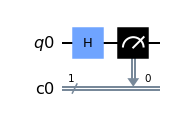

In [3]:
qc.h(q[0])  ## apply Hadamard gate on q0
qc.measure(q[0], c[0])  
qc.draw('mpl')

{'1': 514, '0': 510}


/Users/tony.askar/.local/share/virtualenvs/quantum-computing-notes-7_ZZ-3Va/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/tony.askar/.local/share/virtualenvs/quantum-computing-notes-7_ZZ-3Va/lib/python3.10/site-packages/numpy/linalg/linalg.py:2154: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


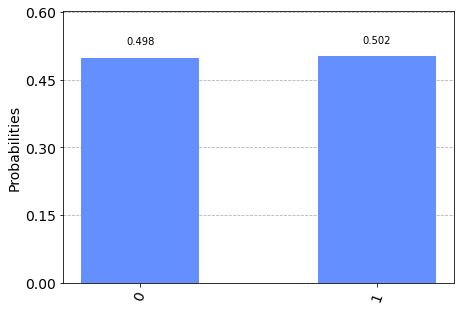

In [4]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)


from qiskit.visualization import plot_histogram
plot_histogram(counts)

{'1': 525, '0': 499}


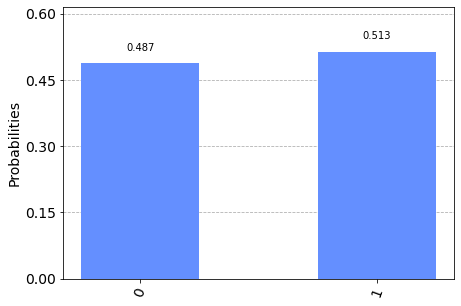

In [5]:
# Let's create a second run of this circuit, to see how to plot two different experiments
job2 = backend.run(qc_compiled, shots=1024)
result2 = job2.result()
counts2 = result2.get_counts()
print(counts2)
plot_histogram(counts2)

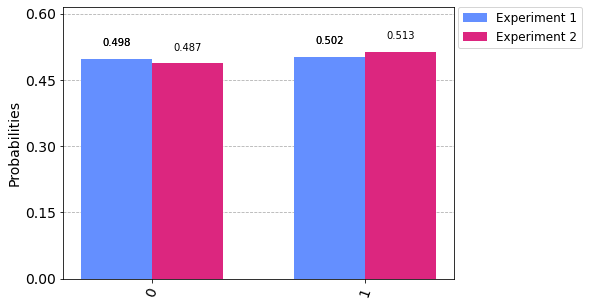

In [6]:
plot_histogram([counts, counts2], legend=['Experiment 1', 'Experiment 2'])

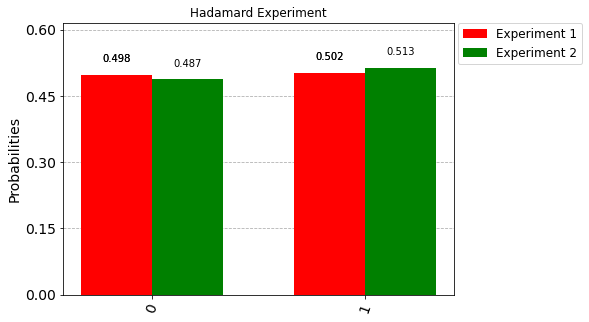

In [7]:
# trying different colors
plot_histogram([counts, counts2], legend=['Experiment 1', 'Experiment 2'], color=['red', 'green'], title='Hadamard Experiment')